### FNN

Numpy [x,y] x: rows, y: columns

in a 2D NumPy array, the structure is such that the outer list represents rows, and the inner lists represent columns within each row.

For example, consider the array np.array([[1, 1, 1], [2, 2, 2]]):

The outer list contains two inner lists, corresponding to the two rows of the array.
Each inner list has three elements, representing the three columns in each row.
Therefore:

The number of rows in the array is determined by the number of inner lists, which is 2 in this case.
The number of columns is determined by the number of elements in each inner list, which is 3.
Thus, the shape of this array is (2, 3), indicating 2 rows and 3 columns. This structure is consistent with standard matrix notation in mathematics, where a matrix is described by its rows and columns.

NN: a tuple with a list with weights and bias.

L: list of integers [a,b,c]

-the first elements should be equal to the number of features of x.

-the last elements must be number of output in the network.

**weights**: (in units, out units) each layer \\
**bias**: (1, out units) \\
if L = [3,5,1] \\
weights: (3,5) (5,1)\\
bias: (1,5) (1,5)

In [2]:
# x[:, :] # extract entire array
# x[:, 0] # extract all rows but only the first column.
# x[:, n] # extract all rows for the n'th column.
# x[0, :] # extract the first row and all columns.
# x[1, :] # extract the second row and all columns
# x[:, 1] # extract all rows and the second column.
# x[::2, :] # extract every other row.
# x[:, ::2] # extract every other column.
# x[1:3, 2:4] # extract a subarray from the second to the third row and the third to the fourth column

## Numpy einsum

**Transpose:** We can write the transpose of matrix $A$:

```
np.einsum('ij -> ji', A)
```

**Trace:** We can write the trace of matrix $A$:

```
np.einsum('ii -> ', A)
```

**Diagonal:** We can write the diagonal of matrix $A$:

```
np.einsum('ii -> i', A)
```

**Matrix product:** We can write the multiplication of matrices $A$ and $B$ as:

```
np.einsum('ij, jk -> ik', A, B)
```

Note that $j$ in both matrices $A$ and $B$ should be the same size.

**Batched matrix product (or why bothering):** All of the functions we performed above are built in numpy (np.tranpose, np.trace, np.matmul), however, when you want to do more complex operations, it might become less readable and computationaly efficient. Let's introduce a three dimensional matrix $H$ with indices $b,j,k$, where the first dimension is the batch (training example) dimension. In einsum, we can then write:

```
np.einsum('ij, bjk -> bik', A, H)
```


# Supervised vs Unsupervised Learning


In [1]:
# load library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets,manifold





In [ ]:
# load data
data = datasets.fetch_openml('mnist_784',version=1,return_X_y=True)
pixel_values,targets = data
targets = targets.astype(int)

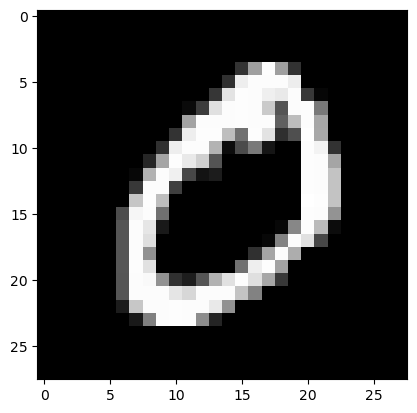

In [4]:
# reshape the samples in original shape
single_image = pixel_values.iloc[1, :].values.reshape(28, 28)
plt.imshow(single_image, cmap='gray')

/var/folders/ff/tm9v3zh91jv9vg9vgbf1rhnr0000gn/T/ipykernel_46379/3196932948.py:10: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  tsne_df.loc[:, "targets"] = tsne_df["targets"].astype(int)


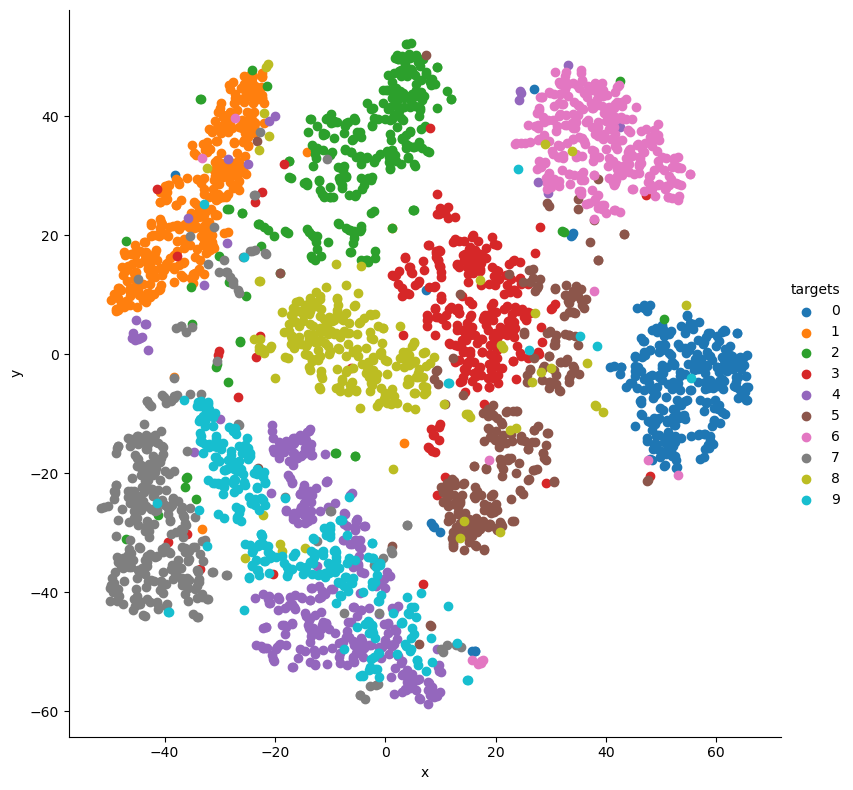

In [5]:
pixel_values_array = pixel_values.to_numpy()
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values_array[:3000,:])

tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[:3000])),
    columns=["x", "y", "targets"]
)

tsne_df.loc[:, "targets"] = tsne_df["targets"].astype(int)

grid = sns.FacetGrid(tsne_df, hue="targets", height=8)
grid.map(plt.scatter, "x", "y").add_legend()

# Cross Validation

In [3]:
import pandas as pd
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# shuffling the dataframe
df = data.sample(frac = 1).reset_index(drop = True)

# top 1000 rows are selected
# for training
df_train = df.head(1000)

# bottom 599 values are selected
# for testing and validation
df_test = df.tail(599)

In [5]:
# The decision tree model
from sklearn import tree
from sklearn import metrics

# initialization decision tree classifier class with a max_depth of 3
#clf = tree.DecisionTreeClassifier(max_depth=3)
# try with depth of 7
clf = tree.DecisionTreeClassifier(max_depth=7)
# choose the columns we want to train on
cols = [
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'density',
    'pH',
    'sulphates',
]

# train the model with provided features
clf.fit(df_train[cols], df_train['quality'])

# prediction on the training set
training_predictions = clf.predict(df_train[cols])

# prediction on the test set
test_predictions = clf.predict(df_test[cols])

# accuracy of predictions on training dataset
training_accuracy = metrics.accuracy_score(df_train['quality'],training_predictions)

# accuracy of predictions on testing dataset
test_accuracy = metrics.accuracy_score(df_test['quality'],test_predictions)

print('Training Accuracy:', training_accuracy)
print('Test Accuracy:', test_accuracy)

Training Accuracy: 0.749
Test Accuracy: 0.5358931552587646


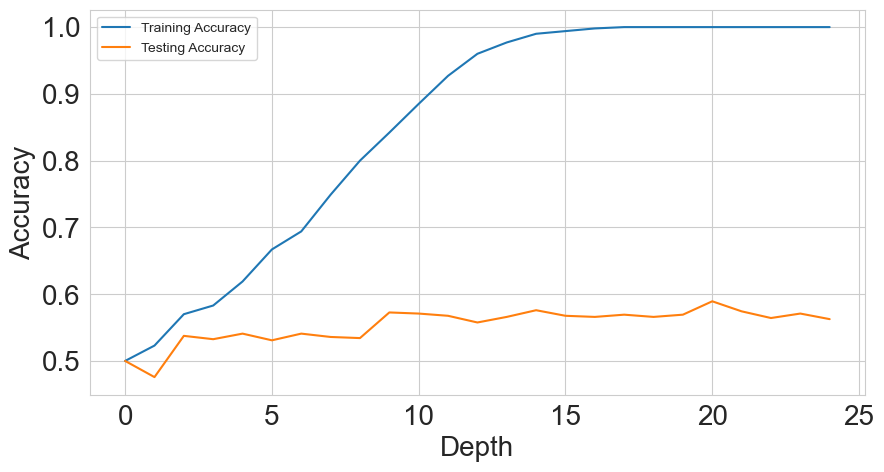

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# this is our global size of label text # on the plots
matplotlib.rc('xtick',labelsize = 20)
matplotlib.rc('ytick',labelsize = 20)

# this ensures that the plot is displayed inside the notebook
%matplotlib inline

# initialize lists to store accuracies for training and testing data
training_accuracy = [0.5]
testing_accuracy = [0.5]

cols = [
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'density',
    'pH',
    'sulphates',
]

# iterate some depts
for depth in range(1,25):
  clf = tree.DecisionTreeClassifier(max_depth=depth)

  # fit the model
  clf.fit(df_train[cols], df_train['quality'])

  # training and testing predictions
  training_predictions = clf.predict(df_train[cols])
  test_predictions = clf.predict(df_test[cols])

  # accuracy of predictions on training
  training_accuracy.append(metrics.accuracy_score(df_train['quality'],training_predictions))

  # accuracy of predictions on testing
  testing_accuracy.append(metrics.accuracy_score(df_test['quality'],test_predictions))

# creating two plots
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(testing_accuracy, label='Testing Accuracy')
plt.legend(loc = 'upper left')
plt.xlabel('Depth',size = 20)
plt.ylabel('Accuracy',size = 20)
plt.show()


In [11]:
# K-fold cross validation
from sklearn import model_selection
import pandas as pd
if __name__ == '__main__':
  # training data is in a csv file called 'train.csv'
  df = pd.read_csv('winequality-red.csv')

  # create a new column called kfold and fill with -1
  df['kfold'] = -1

  # randomize the rows of data
  df = df.sample(frac=1).reset_index(drop=True)

  # initialize the kfold class from model_selection
  kf = model_selection.KFold(n_splits=5)

  # fill the new kfold column
  for f, (t_, v_) in enumerate(kf.split(X=df)): # enumerate function adds a counter to an iterable and return it as an enumerate object.
    df.loc[v_, 'kfold'] = f # df.loc[row_indexer,column_indexer]

  # save the new csv file
  #df.to_csv('train_folds.csv', index=False)

Text(0, 0.5, 'count')

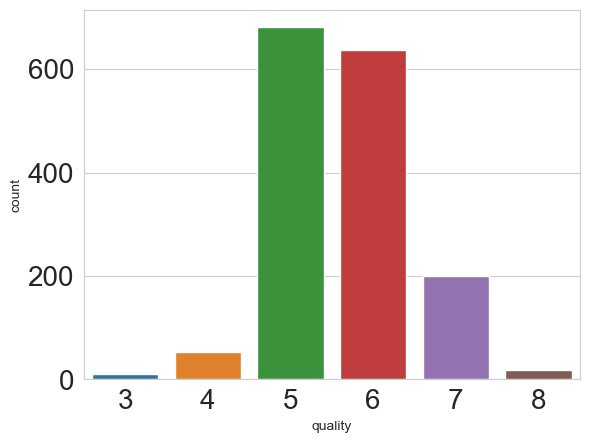

In [12]:
b = sns.countplot(x = 'quality',data = data)
b.set_xlabel('quality')
b.set_ylabel('count')

In [14]:
# stratified k-fold for regression
# Usually simple k-fold cross validation works for any regression problem.
# To use straified k-fold for a regression problem we have to divide the target into bins

import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn import model_selection

def create_folds(data):
  # create a new column called kfold and fill it with -1
  data['kfold'] = -1

  # randomize the rows of data
  data = data.sample(frac=1).reset_index(drop = True)

  # calculate the number of bins by Sturge's rule
  num_bins = int(np.floor(1  + np.log2(len(data))))

  # bin targets
  data.loc[:, 'bins'] = pd.cut(
      data['target'], bins = num_bins, labels = False
  )

  # initialize the kfold class from model_selection module
  kf = model_selection.StratifiedKFold(n_splits=5)

  # fill the new kfold column
  for f, (t_,v_) in enumerate(kf.split(X = data, y = data.bins.values)):
    data.loc[v_,'kfold'] = f

  # drop the bins column
  data = data.drop('bins', axis = 1)

  # return dataframe with folds
  return data

if __name__ == '__main__':
  # we create a sample dataset with 15000 samples
  X, y = datasets.make_regression(
      n_samples = 15000, n_features=100, n_targets= 1)

  # create a dataframe out of our numpy arrays
  df = pd.DataFrame(
      X,
      columns = [f'f_{i}' for i in range(X.shape[1])]
  )
  df.loc[:, 'target'] = y

  # create folds
  df = create_folds(df)

/Users/billhikari/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


# Evaluation metrics

In [13]:
# python code for calculating accuracy
def accurary(y_true, y_pred):
  '''
  A very simple function for calculating accuracy
  '''
  correct = 0

  # loop over all elements of y_true and y_pred
  for yt, yp in zip(y_true, y_pred):
    if yt == yp:
      correct += 1

  # return accuracy
  return correct / len(y_true)

In [10]:
def true_positive(y_true, y_pred):
  """
  Function to calculate True Positives :param y_true: list of true values :
  param y_pred: list of predicted values :return: number of true positives
  """
# initialize
  tp = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 1 and yp == 1: tp += 1
  return tp

def true_negative(y_true, y_pred):
  """
  Function to calculate True Negatives :param y_true: list of true values :
  param y_pred: list of predicted values :return: number of true negatives
  """
# initialize
  tn = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 0 and yp == 0: tn += 1
  return tn

def false_positive(y_true, y_pred):
  """
  Function to calculate False Positives :param y_true: list of true values :
  param y_pred: list of predicted values :return: number of false positives
  """
# initialize
  fp = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 0 and yp == 1: fp += 1
  return fp
def false_negative(y_true, y_pred):
  """
  Function to calculate False Negatives :param y_true: list of true values :
  param y_pred: list of predicted values :return: number of false negatives
  """
# initialize
  fn = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 1 and yp == 0: fn += 1
  return fn


In [25]:
def accuracy_v2(y_true, y_pred):
  tp = true_positive(y_true, y_pred)
  fp = false_positive(y_true, y_pred)
  fn = false_negative(y_true, y_pred)
  tn = true_negative(y_true, y_pred)
  accuracy_score = (tp + tn) / (tp + tn + fp + fn)
  return accuracy_score

In [26]:
def precision(y_true, y_pred):
  """
Function to calculate precision
:param y_true: list of true values :param y_pred: list of predicted values :return: precision score
  """
  tp = true_positive(y_true, y_pred)
  fp = false_positive(y_true, y_pred)
  if tp + fp == 0:
    return 0
  precision = tp / (tp + fp)
  return precision

l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]
precision(l1, l2)

0.6666666666666666

In [27]:
def recall(y_true, y_pred):
  tp = true_positive(y_true, y_pred)
  fn = false_negative(y_true, y_pred)
  recall_score = tp / (tp + fn)
  return recall_score

recall(l1, l2)

0.5

In [28]:
y_true = [0,0,0,1,0,0,0,0,0,0,
          1,0,0,0,0,0,0,0,1,0]

y_pred = [0.02638412, 0.0490937, 0.15952202, 0.079377, 0.27259048, 0.03543574,0.61977213,
0.11114267, 0.0191491, 0.03819563, 0.08584789, 0.03447096, 0.18521942, 0.33056815,
0.31620708, 0.17554844, 0.11639273, 0.39095342, 0.04644807, 0.05934905]

precisions = []
recalls = []

thresholds = [0.0490937 , 0.05934905, 0.079377,0.08584789, 0.11114267,  0.11639273,0.15952202, 0.17554844, 0.18521942, 0.27259048, 0.31620708, 0.39095342, 0.61977213,
 0.33056815]

# for every threshold, calculate predictions in binary and append calculated
# precisions and recalls to their respective lists
for i in thresholds:
  temp_predictions = [1 if x>= i else 0 for x in y_pred]
  p = precision(y_true, temp_predictions)
  r = recall(y_true, temp_predictions)
  precisions.append(p)
  recalls.append(r)

In [29]:
print(recalls)
print(precisions)

[0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.14285714285714285, 0.15384615384615385, 0.16666666666666666, 0.09090909090909091, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Text(0.5, 1.0, 'Precision-Recall Curve')

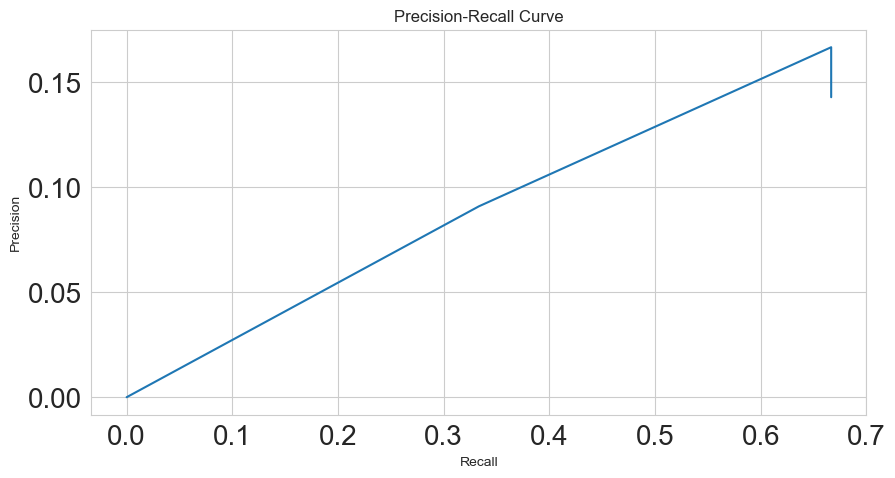

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(recalls, precisions)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

In [31]:
def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)

    score = 2 * p * r / (p + r)
    return score

In [32]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

f1(y_true, y_pred)

0.5714285714285715

In [33]:
from sklearn import metrics
metrics.f1_score(y_true, y_pred)

0.5714285714285715

In [34]:
def tpr(y_true, y_pred):
    '''
    Function to calculate True Positive Rate
    TPR also known as sensitivity
    '''
    return recall(y_true, y_pred)

In [35]:
def fpr(y_true, y_pred):
    '''
    Function to calculate False Positive Rate
    FPR also known as 1 - specificity or Specificity or True Negative Rate
    '''
    fp = false_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    return fp / (tn + fp)

In [36]:
tpr_list = []
fpr_list = []

# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1,0, 0, 1, 0, 1, 0, 0, 1]

# predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99]

# threshold values
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]

# loop over all thresholds
for threshold in thresholds:
    temp_pred = [1 if x >= threshold else 0 for x in y_pred]

    tpr_list.append(tpr(y_true, temp_pred))
    fpr_list.append(fpr(y_true, temp_pred))
    

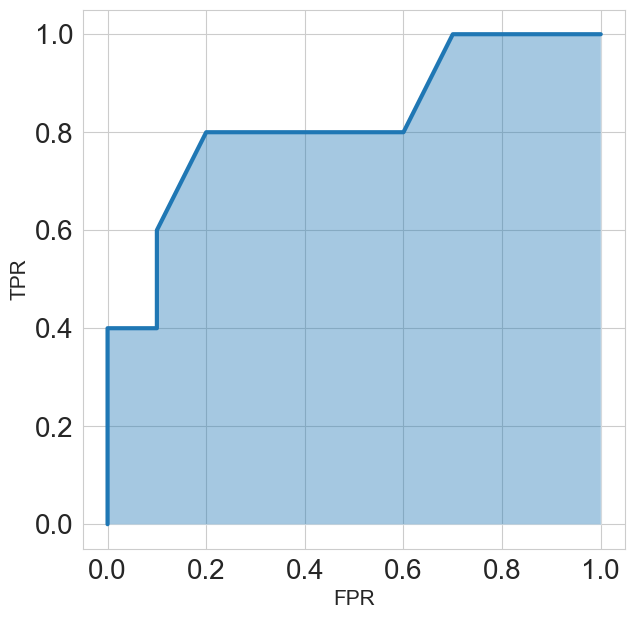

In [37]:
plt.figure(figsize=(7,7))
plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.xlabel('FPR', size = 15)
plt.ylabel('TPR', size = 15)
plt.show()

In [38]:
from sklearn import metrics
metrics.roc_auc_score(y_true, y_pred)

0.8300000000000001

AUC values range from 0 to 1.
- AUC = 1 implies you have a perfect model. Most of the time, it means that you made some mistake with validation and should revisit data processing and validation pipeline of yours. If you didn’t make any mistakes, then congratulations, you have the best model one can have for the dataset you built it on.
- AUC = 0 implies that your model is very bad (or very good!). Try inverting the probabilities for the predictions, for example, if your probability for the positive class is p, try substituting it with 1-p. This kind of AUC may also mean that there is some problem with your validation or data processing.
- AUC = 0.5 implies that your predictions are random. So, for any binary classification problem, if I predict all targets as 0.5, I will get an AUC of 0.5.

Suppose you get an AUC of 0.85 when you build a model to detect pneumothorax from chest x-ray images. 
This means that if you select a random image from your dataset with pneumothorax (positive sample) and another random image without pneumothorax (negative sample), 
then the pneumothorax image will rank higher than a non-pneumothorax image with a probability of 0.85.

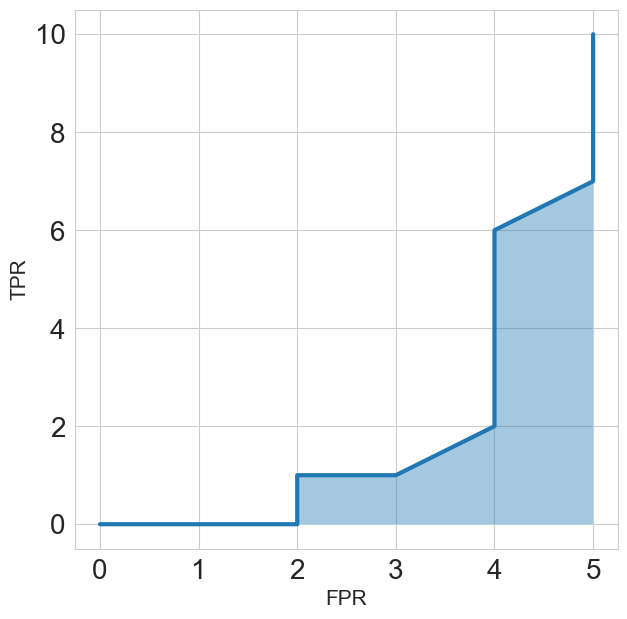

In [39]:
tp_list = []
fp_list = []

# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]

# predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99]

# threshold values
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]

for i in thresholds:
    temp_pred = [1 if x >=i else 0 for x in y_pred]
    temp_tp = true_positive(y_true, temp_pred)
    temp_fp = false_positive(y_true, temp_pred)
    tp_list.append(temp_tp)
    fp_list.append(temp_fp)

plt.figure(figsize=(7,7))
plt.fill_between(tp_list, fp_list, alpha=0.4)
plt.plot(tp_list, fp_list, lw=3)
plt.xlabel('FPR', size = 15)
plt.ylabel('TPR', size = 15)
plt.show()

In [42]:
# log loss
import numpy as np

def log_loss(y_true, y_proba):
    epsilon = 1e-15
    loss = []

    for yt, yp in zip(y_true, y_proba):
        yp = np.clip(yp, epsilon, 1 - epsilon) # adjust probablities
        temp_loss = - 1.0 * (yt * np.log(yp) + (1 - yt) * np.log(1 - yp))
        loss.append(temp_loss)
    return np.mean(loss)

y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
y_proba = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99]

log_loss(y_true, y_proba)

0.49882711861432294

In [44]:
from sklearn import metrics
metrics.log_loss(y_true, y_proba)

0.49882711861432294

In [45]:
# macro-average precision
import numpy as np

def macro_precision(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    precision = 0

    for class_ in range(num_classes):
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]

        tp = true_positive(temp_true, temp_pred)
        fp = false_positive(temp_true, temp_pred)
        temp_precision = tp / (tp + fp)

        precision += temp_precision
    precision /= num_classes
    return precision


In [52]:
# micro-average precision
def micro_precision(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    tp = 0
    fp = 0

    for class_ in range(num_classes):
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]

        tp += true_positive(temp_true, temp_pred)
        fp += false_positive(temp_true, temp_pred)
    precision = (tp / (tp + fp))
    return precision

In [53]:
# weihted precision
from collections import Counter
import numpy as np

def weighted_precision(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    precision = 0
    # create class:sample count dictionary # it looks something like this:
    # {0: 20, 1:15, 2:21}
    class_counts = Counter(y_true)
    for class_ in range(num_classes):
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]

        tp = true_positive(temp_true, temp_pred)
        fp = false_positive(temp_true, temp_pred)
        temp_precision = tp / (tp + fp)

        weighted_precision = class_counts[class_] * temp_precision
        precision += weighted_precision
    overall_precision = precision / len(y_true)
    return overall_precision


In [57]:
from sklearn import metrics
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

print(macro_precision(y_true, y_pred))
print(metrics.precision_score(y_true, y_pred, average='macro'))



0.3611111111111111
0.3611111111111111


In [58]:
print(micro_precision(y_true, y_pred))
print(metrics.precision_score(y_true, y_pred, average='micro'))


0.4444444444444444
0.4444444444444444


In [59]:
print(weighted_precision(y_true, y_pred))
print(metrics.precision_score(y_true, y_pred, average='weighted'))

0.39814814814814814
0.39814814814814814


In [60]:
# recall for multiclass classification
import numpy as np

def macro_recall(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    recall = 0

    for class_ in range(num_classes):
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]

        tp = true_positive(temp_true, temp_pred)
        fn = false_negative(temp_true, temp_pred)
        temp_recall = tp / (tp + fn)
        recall += temp_recall
    recall /= num_classes
    return recall

In [62]:
print(macro_recall(y_true, y_pred))
print(metrics.recall_score(y_true, y_pred, average='macro'))

0.4166666666666667
0.4166666666666667


In [65]:
from collections import Counter
import numpy as np

def weighted_f1(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    f1 = 0
    class_counts = Counter(y_true)

    for class_ in range(num_classes):
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]

        p = precision(temp_true, temp_pred)
        r = recall(temp_true, temp_pred)

        # calculate f1 for current class
        if p + r != 0:
            temp_f1 = 2 * p * r / (p + r)
        else:
            temp_f1 = 0
        
        # multiply f1 with count of samples in class
        weighted_f1 = class_counts[class_] * temp_f1
        f1 += weighted_f1
    overall_f1 = f1 / len(y_true)
    return overall_f1

In [66]:
print(weighted_f1(y_true, y_pred))
print(metrics.f1_score(y_true, y_pred, average='weighted'))

0.41269841269841273
0.41269841269841273


Text(72.25, 0.5, 'Actuals')

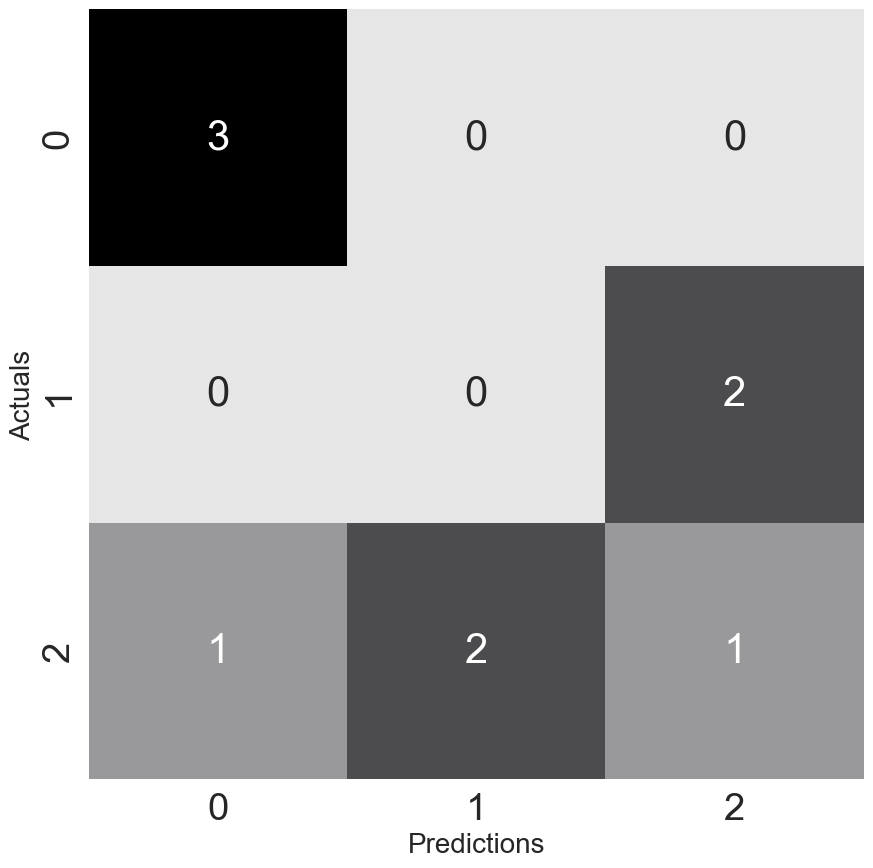

In [67]:
# confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

y_target = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

cm = metrics.confusion_matrix(y_target, y_pred)

plt.figure(figsize = (10,10))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.set(font_scale=2.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False)
plt.xlabel('Predictions', fontsize=20)
plt.ylabel('Actuals', fontsize=20)

In [68]:
# precision at k or P@k

def pk(y_true, y_pred, k):
    if k == 0:
        return 0
    
    # we are only interested in top-k predictions
    y_pred = y_pred[:k]

    # convert predictions to set
    pred_set = set(y_pred)

    # convert actual values to set
    true_set = set(y_true)

    # find common values
    common_values = pred_set.intersection(true_set)

    # return length of common values over k
    return len(common_values) / len(y_pred[:k])

In [69]:
# average precision at k or AP@k

def apk(y_true, y_pred, k):
    pk_values = []

    for i in range(1, k + 1):
        pk_values.append(pk(y_true, y_pred, i))
    if len(pk_values) == 0:
        return 0
    return sum(pk_values) / len(pk_values)

In [72]:
y_true = [
    [1, 2, 3],
    [0, 2],
    [1],
    [2, 3],
    [1, 0],
    []
]

y_pred = [
    [0, 1,2],
    [1],
    [0, 2,3],
    [2, 3,4,0],
    [0, 1,2],
    [0]
]

for i in range(len(y_true)):
    for j in range(1, 4):
        print(f'AP@{j} : {apk(y_true[i], y_pred[i], j)}')



AP@1 : 0.0
AP@2 : 0.25
AP@3 : 0.38888888888888884
AP@1 : 0.0
AP@2 : 0.0
AP@3 : 0.0
AP@1 : 0.0
AP@2 : 0.0
AP@3 : 0.0
AP@1 : 1.0
AP@2 : 1.0
AP@3 : 0.8888888888888888
AP@1 : 1.0
AP@2 : 1.0
AP@3 : 0.8888888888888888
AP@1 : 0.0
AP@2 : 0.0
AP@3 : 0.0


In [73]:
# mean average precision or MAP@k

def mapk(y_true, y_pred, k):
    apk_values = []

    for i in range(len(y_true)):
        apk_values.append(apk(y_true[i], y_pred[i], k))
    return sum(apk_values) / len(y_true)

In [75]:
print(mapk(y_true, y_pred, 1))
print(mapk(y_true, y_pred, 2))
print(mapk(y_true, y_pred, 3))
print(mapk(y_true, y_pred, 4))

0.3333333333333333
0.375
0.3611111111111111
0.34722222222222215


In [2]:
import numpy as np

def apk(actural, predicted, k=10):
    '''
    Computes the average precision at k
    '''
    if len(predicted) > k:
        predicted = predicted[:k]
    
    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actural and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i + 1.0)
    if not actural:
        return 0.0
    return score / min(len(actural), k)


In [3]:
# Mean abosulte error (MAE)
def mean_absolute_error(y_true, y_pred):
    
    error = 0

    # loop over all samples in the true and predicted list
    for yt,yp in zip(y_true, y_pred):
        error += np.abs(yt - yp)
    return error / len(y_true)


In [4]:
# Mean squared error (MSE)
def mean_squared_error(y_true, y_pred):
    
    error = 0

    # loop over all samples in the true and predicted list
    for yt, yp in zip(y_true, y_pred):
        error += (yt - yp) ** 2
    return error / len(y_true)

In [5]:
# Mean squared logarithmic error (MSLE)
import numpy as np

def mean_squared_log_error(y_true, y_pred):
    error = 0

    for yt, yp in zip(y_true, y_pred):
        error += (np.log(1 + yt)) - np.log(1 + yp) ** 2
    return error / len(y_true)


In [6]:
# Mean percentage error (MPE)

def mean_percentage_error(y_true, y_pred):
    error = 0

    for yt, yp in zip(y_true, y_pred):
        error += (yt - yp) / yt
    return error / len(y_true)

In [7]:
# Mean absolute percentage error (MAPE)

def mean_absolute_percentage_error(y_true, y_pred):
    error = 0

    for yt, yp in zip(y_true, y_pred):
        error += np.abs(yt - yp) / yt
    return error / len(y_true)

In [8]:
# R squared

import numpy as np

def r2(y_true, y_pred):
    '''
    R squared is also known as the coefficient of determination
    '''

    # calculate the mean value of true values
    mean_true_value = np.mean(y_true)

    # initialize numerator with 0
    numerator = 0
    # initialize denominator with 0
    denominator = 0

    # loop over all true and predicted values
    for yt, yp in zip(y_true, y_pred):
        numerator += (yt - yp) ** 2
        denominator += (yt - mean_true_value) ** 2
    ratio = numerator / denominator
    return 1 - ratio

In [9]:
# Cohen's Kappa

from sklearn import metrics

y_true = [1, 2, 3, 1, 2, 3, 1, 2, 3]
y_pred = [2, 1, 3, 1, 2, 3, 3, 1, 2]

print(metrics.cohen_kappa_score(y_true, y_pred, weights='quadratic'))
print(metrics.accuracy_score(y_true, y_pred))

0.33333333333333337
0.4444444444444444


In [11]:
# Matthew's correlation coefficient (MCC)

def mcc(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)

    numerator = (tp * tn) - (fp * fn)
    denominator = ((tp + fp) * (fn + tn) * (fp + tn) * (tp + fn)) ** 0.5
    return numerator / denominator